What are the most demanded skills for the top 3 most popular data roles?

Methodology

1. Clean-up skill column
2. Calculate skill count based on job title short
3. Plot initial findings
4. Calculate skill percentage
5. Plot final findings


In [ ]:
#importing libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset


# loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

#Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df['job_skills']  = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [13]:
df_US = df[df['job_country'] == 'United States'] 

df_skills = df_US.explode('job_skills')

df_skills[['job_title', 'job_skills']]

,job_title,job_skills
0,Senior Clinical Data Engineer / Principal Clin...,None
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,python
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,c++
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,java
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,matlab
...,...,...
785692,Data Scientist- Hybrid Work Location,r
785703,Data Analyst - CRYPTOGRAPHY - Full-time,None
785705,Expert Business Data Analyst - Now Hiring,sql
785705,Expert Business Data Analyst - Now Hiring,python


In [22]:
df_skill_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

df_skill_count = df_skill_count.reset_index(name='skill_count')

df_skill_count

,job_skills,job_title_short,skill_count
0,airflow,Business Analyst,38
1,airflow,Cloud Engineer,27
2,airflow,Data Analyst,387
3,airflow,Data Engineer,4716
4,airflow,Data Scientist,1166
...,...,...,...
1865,zoom,Machine Learning Engineer,5
1866,zoom,Senior Data Analyst,50
1867,zoom,Senior Data Engineer,30
1868,zoom,Senior Data Scientist,25


In [26]:
df_skill_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skill_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
1327,rust,Business Analyst,1
1124,planner,Software Engineer,1
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1


In [33]:
job_titles = df_skill_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

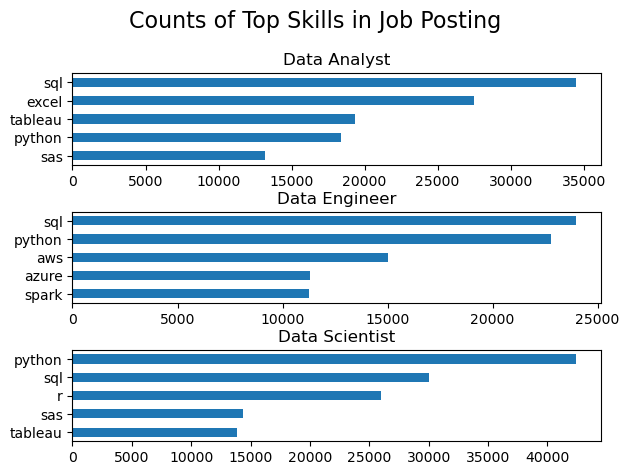

In [46]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skill_count[df_skill_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i],  title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Counts of Top Skills in Job Posting', fontsize=16)
plt.tight_layout(h_pad=0.2)

plt.show()

In [51]:
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name='jobs__total')

df_job_title_count

,job_title_short,jobs__total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [52]:
df_skill_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
1327,rust,Business Analyst,1
1124,planner,Software Engineer,1
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1


In [58]:
df_skill_percent = pd.merge(df_skill_count, df_job_title_count, how='left', on = 'job_title_short')

In [61]:
df_skill_percent['skill_percent'] = 100 * df_skill_percent['skill_count'] / df_skill_percent['jobs__total']

df_skill_percent

,job_skills,job_title_short,skill_count,jobs__total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,rust,Business Analyst,1,7382,0.013546
1866,planner,Software Engineer,1,1814,0.055127
1867,clojure,Software Engineer,1,1814,0.055127
1868,vb.net,Senior Data Scientist,1,12946,0.007724


In [ ]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skill_percent[df_skill_percent['job_title_short'] == job_title].head(5)
    # df_plot.plot(kind='barh', x='job_skills', y='skill_percent', ax=ax[i],  title=job_title)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_percent', palette='dark:b_r')
    ax[i].set_ylabel('')
    ax[i].set_title(job_title)
    ax[i].set_xlim(0, 78)
    ax[i].set_xlabel('')
    ax[i].legend().set_visible(False)

    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, (f'{v}%'), va= 'center')

fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize=16)
plt.tight_layout(h_pad=0.2)

plt.show()

SyntaxError: unmatched ')' (1565613895.py, line 16)

In [ ]:
int(f'{v}%')